## Tesla (TSLA) Stock Price Prediction using Facebook Prophet


In [ ]:
# Switch to GPU mode faster computations
# Runtime > Change runtime type > T4 GPU

### Importing all the necessary libraries

In [ ]:
!pip install prophet

In [2]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [3]:
# Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

### Importing the Dataset & Exploring it

In [6]:
import yfinance as yf

df = yf.download("TSLA", period="1y", auto_adjust=False)

# flatten columns
df.columns = df.columns.get_level_values(0)

df.to_csv("TSLA.csv")



[*********************100%***********************]  1 of 1 completed


In [7]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2025-01-03,410.440002,410.440002,411.880005,379.450012,381.480011,95423300
1,2025-01-06,411.049988,411.049988,426.429993,401.700012,423.200012,85516500
2,2025-01-07,394.359985,394.359985,414.329987,390.000000,405.829987,75699500
3,2025-01-08,394.940002,394.940002,402.500000,387.399994,392.950012,73038800
4,2025-01-10,394.739990,394.739990,399.279999,377.290009,391.399994,62287300


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Adj Close  250 non-null    float64
 2   Close      250 non-null    float64
 3   High       250 non-null    float64
 4   Low        250 non-null    float64
 5   Open       250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [8]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,357.205920,357.205920,365.067119,349.019080,357.322720,9.759877e+07
std,70.151155,70.151155,70.542918,70.058245,70.647761,3.453261e+07
min,221.860001,221.860001,230.100006,214.250000,223.779999,3.625290e+07
25%,308.614990,308.614990,312.860008,301.057503,308.792496,7.505260e+07
50%,344.044998,344.044998,351.194992,337.600006,345.449997,9.197905e+07
75%,426.017502,426.017502,433.132507,416.574989,423.845009,1.120794e+08
max,489.880005,489.880005,498.829987,485.329987,489.880005,2.874998e+08


### Data Visualization using plotly express - Visualizing the historical performance of Tesla

In [10]:
px.area(df, x="Date", y="Close")

In [11]:
px.line(df, x="Date", y="Close")

In [12]:
px.area(df, x="Date", y="Volume")

In [13]:
px.bar(df, y="Volume")

In [14]:
px.box(df, y="Close")

### Data Preparation

In [15]:
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2025-01-03,410.440002,410.440002,411.880005,379.450012,381.480011,95423300
1,2025-01-06,411.049988,411.049988,426.429993,401.700012,423.200012,85516500
2,2025-01-07,394.359985,394.359985,414.329987,390.000000,405.829987,75699500
3,2025-01-08,394.940002,394.940002,402.500000,387.399994,392.950012,73038800
4,2025-01-10,394.739990,394.739990,399.279999,377.290009,391.399994,62287300
...,...,...,...,...,...,...,...
245,2025-12-26,475.190002,475.190002,489.089996,473.820007,485.230011,58780700
246,2025-12-29,459.640015,459.640015,469.399994,459.000000,469.000000,66263000
247,2025-12-30,454.429993,454.429993,463.119995,453.829987,461.089996,59238500
248,2025-12-31,449.720001,449.720001,456.549988,449.299988,456.100006,49078000


In [17]:
columns = ['Date', 'Close']
new_df = pd.DataFrame(df, columns=columns)

In [18]:
new_df

,Date,Close
0,2025-01-03,410.440002
1,2025-01-06,411.049988
2,2025-01-07,394.359985
3,2025-01-08,394.940002
4,2025-01-10,394.739990
...,...,...
245,2025-12-26,475.190002
246,2025-12-29,459.640015
247,2025-12-30,454.429993
248,2025-12-31,449.720001


In [20]:
prophet_df = new_df.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df

,ds,y
0,2025-01-03,410.440002
1,2025-01-06,411.049988
2,2025-01-07,394.359985
3,2025-01-08,394.940002
4,2025-01-10,394.739990
...,...,...
245,2025-12-26,475.190002
246,2025-12-29,459.640015
247,2025-12-30,454.429993
248,2025-12-31,449.720001


### Creating Facebook Prophet Model

In [21]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecasting

In [23]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-01-03,423.136431,390.603349,461.967018,423.136431,423.136431,2.569584,2.569584,2.569584,2.569584,2.569584,2.569584,0.0,0.0,0.0,425.706015
1,2025-01-06,416.878666,386.135515,454.728074,416.878666,416.878666,3.050542,3.050542,3.050542,3.050542,3.050542,3.050542,0.0,0.0,0.0,419.929208
2,2025-01-07,414.792745,380.896420,450.410437,414.792745,414.792745,2.337510,2.337510,2.337510,2.337510,2.337510,2.337510,0.0,0.0,0.0,417.130255
3,2025-01-08,412.706823,382.863997,454.705179,412.706823,412.706823,5.016072,5.016072,5.016072,5.016072,5.016072,5.016072,0.0,0.0,0.0,417.722895
4,2025-01-10,408.534980,373.800481,448.960812,408.534980,408.534980,2.569584,2.569584,2.569584,2.569584,2.569584,2.569584,0.0,0.0,0.0,411.104564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2026-01-28,493.042670,462.338891,535.810389,489.145092,497.158879,5.016072,5.016072,5.016072,5.016072,5.016072,5.016072,0.0,0.0,0.0,498.058742
276,2026-01-29,493.810540,459.922825,530.934888,489.669555,498.265784,1.350587,1.350587,1.350587,1.350587,1.350587,1.350587,0.0,0.0,0.0,495.161127
277,2026-01-30,494.578410,460.559130,532.317497,490.180235,499.253602,2.569584,2.569584,2.569584,2.569584,2.569584,2.569584,0.0,0.0,0.0,497.147995
278,2026-01-31,495.346281,452.408388,521.887304,490.644392,500.274479,-7.162148,-7.162148,-7.162148,-7.162148,-7.162148,-7.162148,0.0,0.0,0.0,488.184132


In [25]:
px.line(forecast, x='ds', y='yhat')

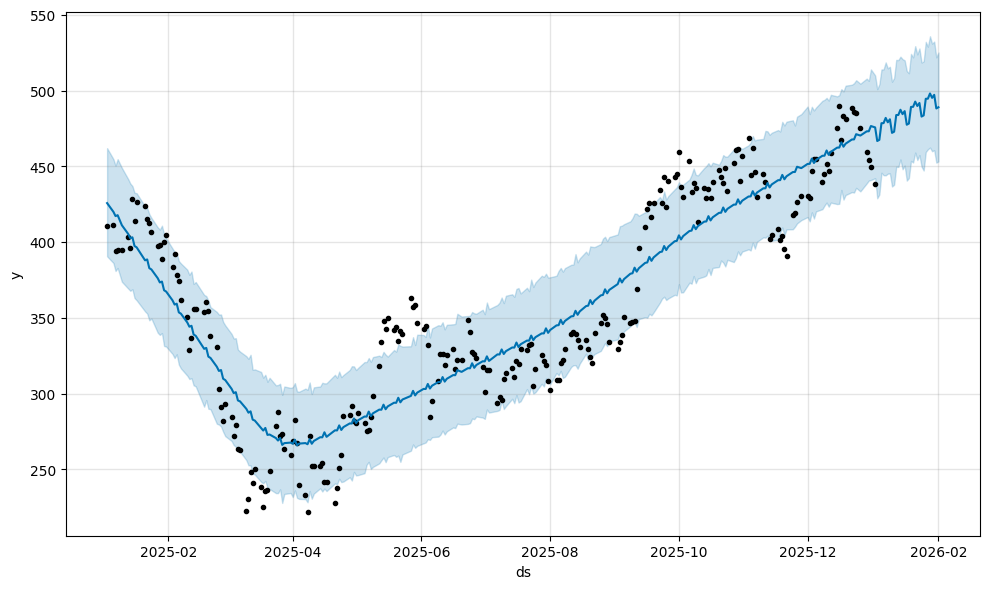

In [26]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')

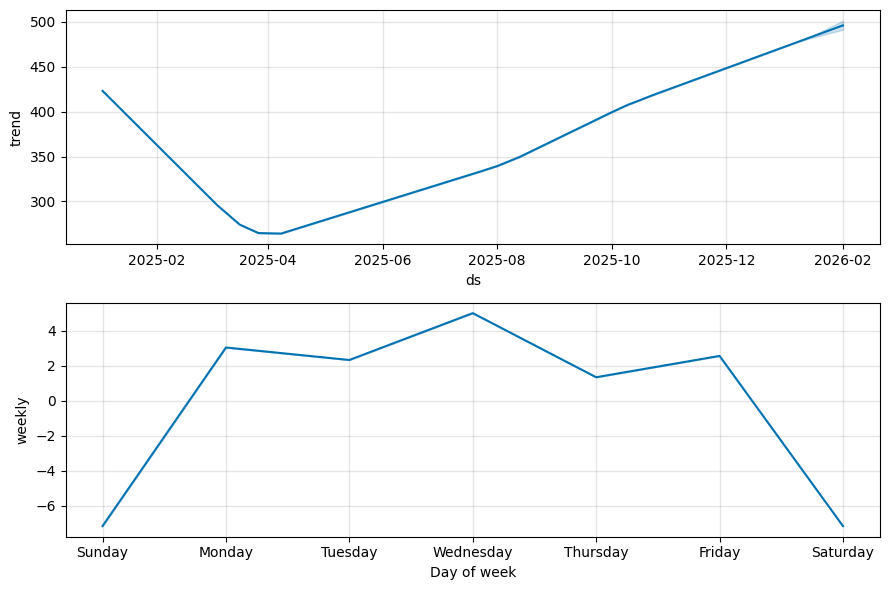

In [27]:
figure2 = model.plot_components(forecast)

### Downloading the Forecast Data

In [28]:
from google.colab import files
forecast.to_csv("forecast.csv")

files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
files.download("TSLA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>